# 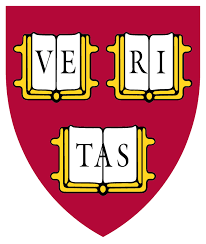 CS-S109A Introduction to Data Science 

## Lecture 1: Hubway Example


**Harvard University**<br/>
**Summer 2021**<br/>
**Instructors**: Kevin Rader

---

## If you have not installed Conda and have Jupyter Notebooks running properly on your computer, please see *Lab 0* on the course Canvas website (or on git).

In [ ]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [ ]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import datetime
%matplotlib inline


Download the data from (29MB):

https://drive.google.com/open?id=0B28c493CP9GtMzN1emFoMkJNNlU


## 1. Data Manipulation & Wrangling

Manipulation, not Modificaition (important distinction).  Fill-in the 3 different 'Your code here' sections below to perform the tasks given.

In [ ]:
# you may need to change the path here:
hubway_data_file = '~/Downloads/hubway_data/hubway_trips.csv'

# read in the data using pandas 'read_csv' funciton
hubway_data = pd.read_csv(hubway_data_file, low_memory=False)


In [ ]:
# use the pd.head command to view the first 5 rows of the data set and pd.tail to print out the last 10 rows
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html


################
# Your code here
################



In [ ]:
# determine the size and dimensions of the data frame using df.size and df.shape 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html
# pull off the column and row names using df.columns and df.index.values

################
# Your code here
################




In [ ]:
# pull off the first 2 entries of the gender variable:

print(hubway_data['gender'][0:2])

# the ever important 'values' command: this converts a pandas object 
# to a numpy array.  We'll learn more about this next time.

print(hubway_data['gender'][0:2].values)


In [ ]:
# processing the checkout dates a little 

print(hubway_data['start_date'][0])

# pull off the hour into 'checkout_hour'
checkout_hour = hubway_data['start_date'].apply(lambda s: int(s[-8:-6]))
print(checkout_hour[0:3])

# create 'checkout_year' to pull of the year of the checkout start time.

################
# Your code here
################




---

## 2. Data Exploration
### Who?

Use the data frame to explore the distributions of user type, gender, and age (4 'Your code here' fill-ins).

In [ ]:
# create a table, a barplot, and pie chart of subscriber type: 'subsc_type'

# 2 ways to do the same thing:
subsc_counts = np.unique(hubway_data['subsc_type'], return_counts=True)
print(subsc_counts)

print(np.unique(hubway_data.subsc_type,return_counts=True))

# now for the barplot
plt.bar(subsc_counts[0],subsc_counts[1])
plt.show()

In [ ]:
# Create a table of counts for each gender in the checkout data set 
# Use this table to create a bar plot of gender 
# Hint: use .dropna() on the relevant variable


################
# Your code here
################



In [ ]:

# create a variable 'age' outside the data frame for the ages of users (use 'checkout_year').  
# Then add the variable into the data frame  

################
# Your code here
################




# calculate mean, median, sd, min, and max of the ages of hubway users
# be careful handling nan's in np.median (.dropna() may be helpful)

################
# Your code here
################



# Create the default histogram of age using plt.hist.  
# Then improve the histogram with bins of 15-19, 20-24, etc. and improved labels
# plt.xlabel, plt.ylabel, and plt.title will be useful

################
# Your code here
################






## 3. Interpretation Questions: 

1. Use summary statistics and the histogram above to describe the distribution of user ages in the data set.

2. What is wrong with the statement "The average age of Hubway bike share users is roughly 35.5 years old"?.

3. What would be a better interpretation of the mean age of the users calcualted here?

*Your answer here*


## 4. More Visualizations

Look at creating subfigures and exploring the usage across location (distance from Boston 'center city').


In [ ]:

# subplots: put both the barplot of gender and histogram of time into the same figure

fig, ax = plt.subplots(1, 2, figsize=(15, 6))


# use ax[0].bar to put the barplot in the first subplot 


################
# Your code here
################


################
# Your code here
################




#plt.tight_layout()


### Where

In [ ]:
# read in the separate station data

station_data = pd.read_csv('hubway_stations.csv', low_memory=False)[['station','id', 'lat', 'lng']]
station_data.head()

In [ ]:
# join the two together data

hubway_data_with_gps = hubway_data.join(station_data.set_index('id'), on='strt_statn')
hubway_data_with_gps.head()

In [ ]:

# determine the number of checkouts at each station, and add 'checkouts' to the 'station_data' data frame
# Hint: use .dropna() on the relevant variable

################
# Your code here
################



![Alt](../fig/Lecture1a_g2.png)

In [ ]:
# a user-defined function to calculate distances 'as the crow flies'

def haversine(pt, lat2=42.3604, lon2=-71.05868):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    Center City (of Boston) is the default comparison point
    """
    lon1 = pt[0]
    lat1 = pt[1]
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3958.8 # Radius of earth in miles
    return c * r

In [ ]:
# using the hersine function to create 'dist_to_center' variable 
dist_to_center = list(map(haversine, station_data[['lng', 'lat']].values))

# add 'dist_to_center' to the 'station_data' data frame

################
# Your code here 
################




In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# use ax.scatter to create a scatter plot of x = 'dist_to_center' and y = 'checkouts'

################
# Your code here
################

# plt.show

### When...this is done for you

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# tabulating the hour of the day that users checkout the bikes

checkout_counts = np.unique(checkout_hour, return_counts=True)
plt.bar(checkout_counts[0], checkout_counts[1], align='center', width=0.8, alpha=0.6)
ax.set_xlim([-1, 24])
ax.set_xticks(range(24))
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Checkouts')
ax.set_title('Time of Day vs Checkouts')

plt.show()

## 5. More Interpretations

1. What do you notice in the scatterplot of checkouts vs. distance above?  What does this say about useage of the system, in general?

2. What type of figre is the above plot titled 'Time of Day vs Checkouts'?  Describe what you notice in it.  Why does this make sense?

3. How can Hubway use this information to improve their systems?

*your answer here*



## 6. Further Investigations:

Explore the data to investigate three questions:
    
1. Which station is most popular (for check-outs)?

2. How long does it take to bike from 'Harvard Square at Mass Ave/ Dunster' (closest stop to Harvard Square center) to 'South Station - 700 Atlantic Ave.' (to catch a train)?

3. What are noticeable differences between Registered and Casual users?  Consider variables we've already looked at or created.


In [ ]:
# answering #1: Which station is most popular (for check-outs)?

################
# Your code here
################



In [ ]:
# answering #2 :  How long does it take to bike from 'Harvard Square at Mass Ave/ Dunster' 
# (closest stop to Harvard Square center) to 'South Station - 700 Atlantic Ave.' (to catch a train)?

harvard_id = station_data['id'][station_data['station']=='Harvard Square at Mass Ave/ Dunster']

################
# Your code here
################


In [ ]:
# answering #3 What are noticeable differences between Registered and Casual users?  
# Consider variables we've already looked at or created.

################
# Your code here
################



*your answer here*

